In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
df = pd.read_csv('train.csv')
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
columns = list(df.columns)
print('columns: ', columns)
targets = df['target']
columns.remove('id')
columns.remove('target')
true_target_index = []
false_target_index = []
for i in range(len(targets)):
    if targets[i] == 1:
        true_target_index.append(i)
    else:
        false_target_index.append(i)
features = {}
false_features = {}
for column in columns:
    features[column] = np.take(list(df[column]), true_target_index)
    false_features[column] = np.random.choice(np.take(list(df[column]), false_target_index), 10000)

columns:  ['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n
    
    return x, y

In [5]:
def plot_ecdf(column_name, true_f, false_f):
    # Compute ECDF for versicolor data: x_vers, y_vers
    x_true, y_true = ecdf(true_f[column_name])

    # Generate plot
    _ = plt.plot(x_true, y_true, marker = '.', linestyle = '-', color='green', alpha=1.0)
    
    x_false, y_false = ecdf(false_f[column_name])
    
    _ = plt.plot(x_false, y_false, marker = '.', linestyle = '-', color='red', alpha=0.1)

    # Make the margins nice
    _ = plt.margins(0.02)
    
    # Label the axes
    _ = plt.xlabel(column_name)
    _ = plt.ylabel('ECDF')
    _ = plt.legend


    # Display the plot
    plt.show()

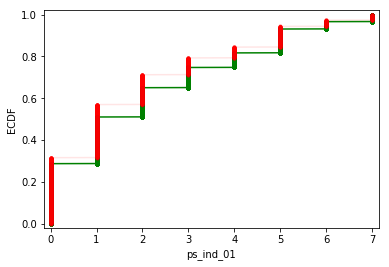

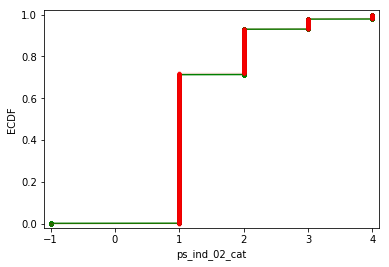

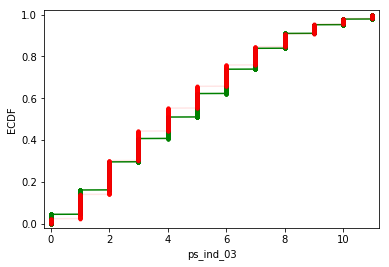

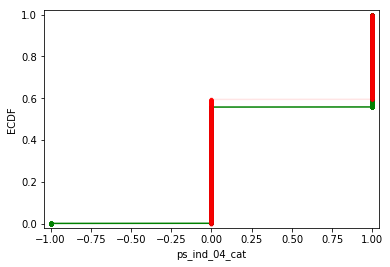

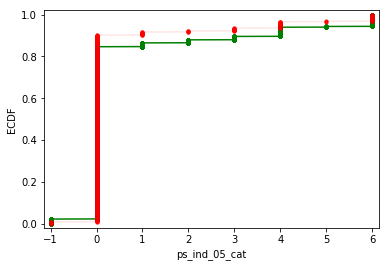

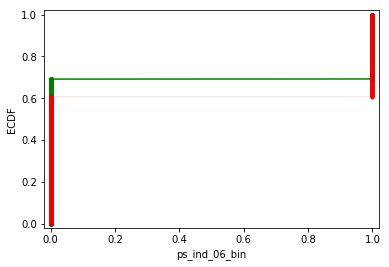

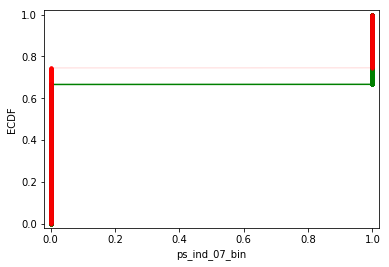

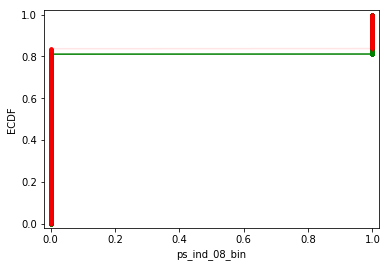

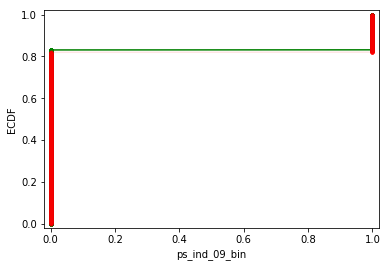

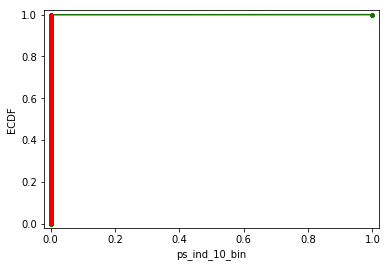

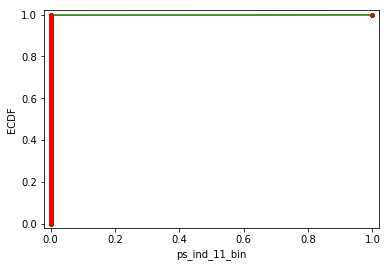

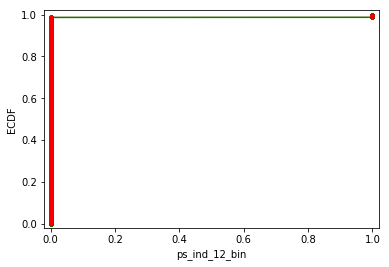

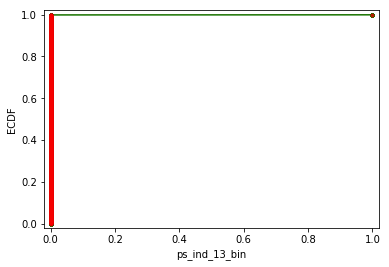

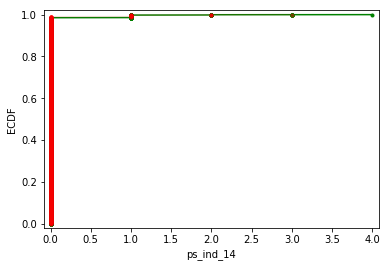

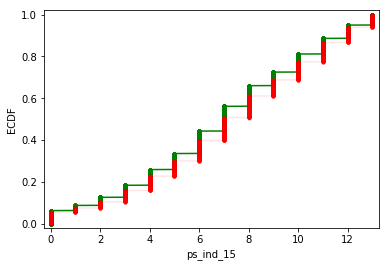

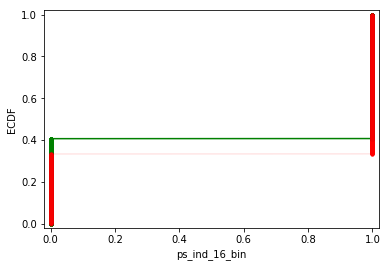

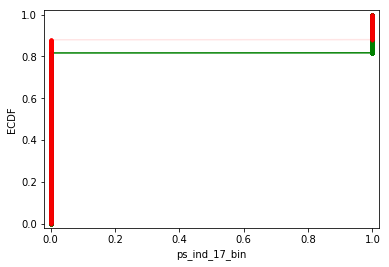

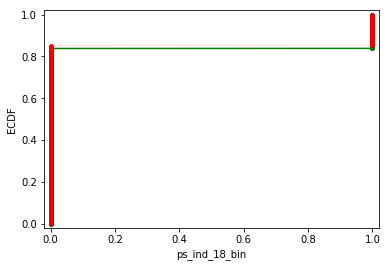

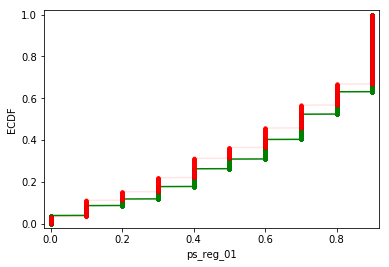

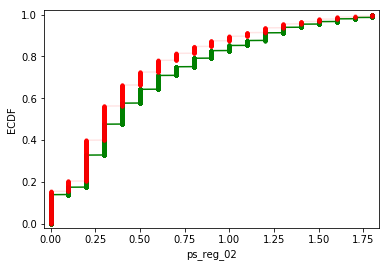

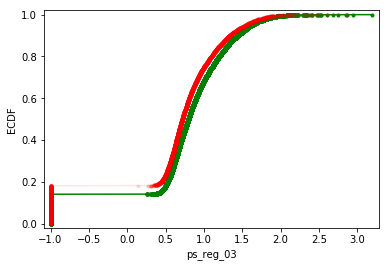

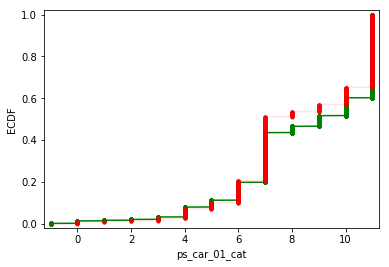

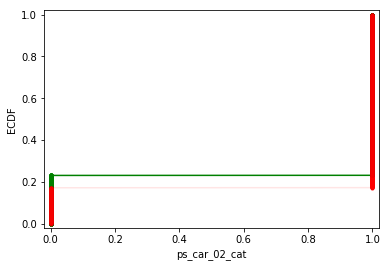

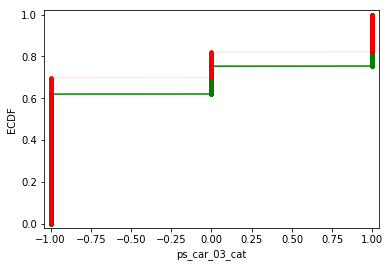

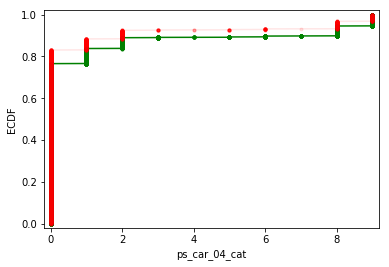

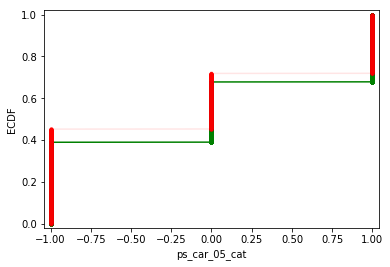

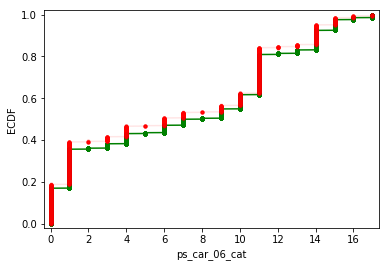

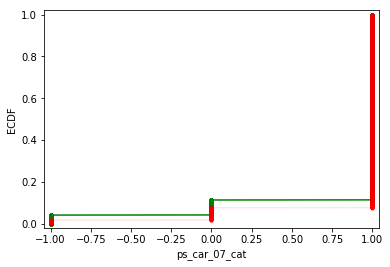

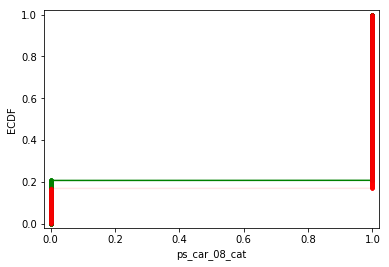

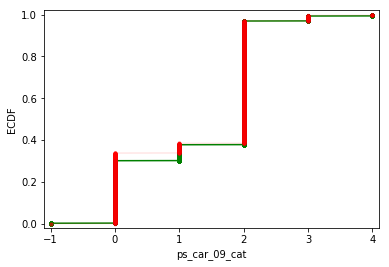

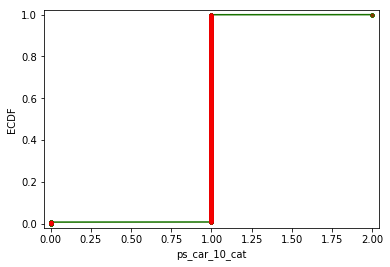

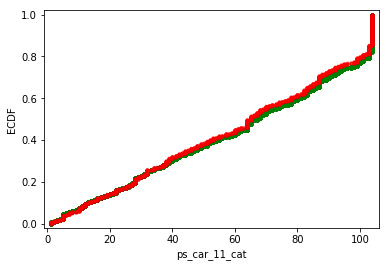

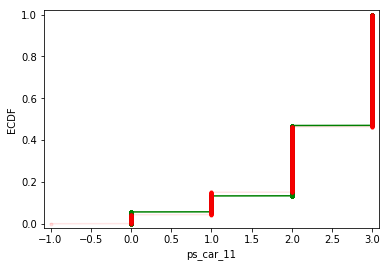

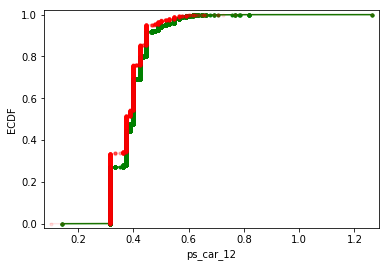

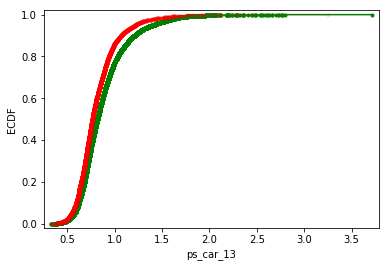

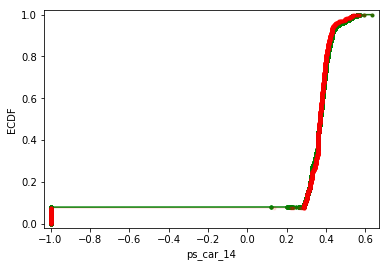

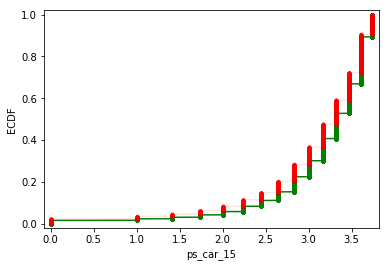

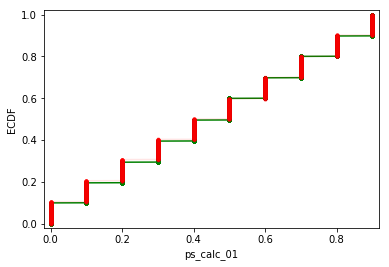

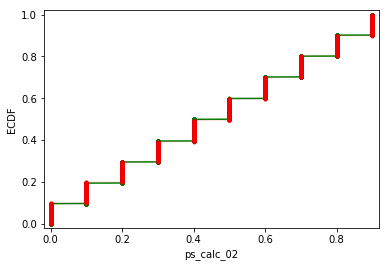

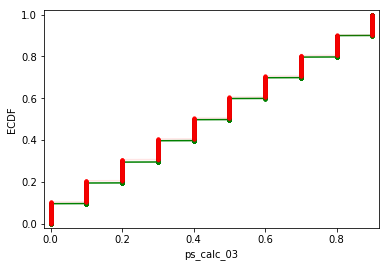

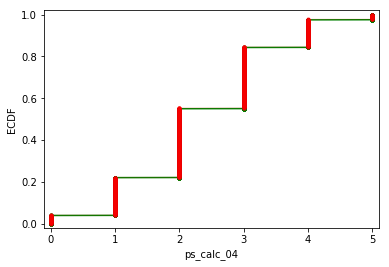

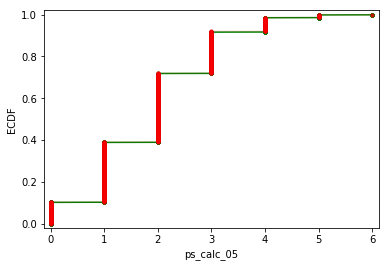

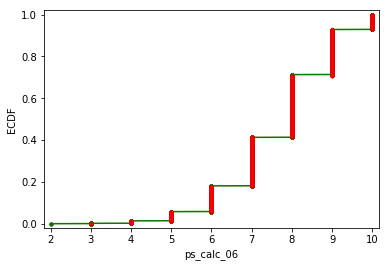

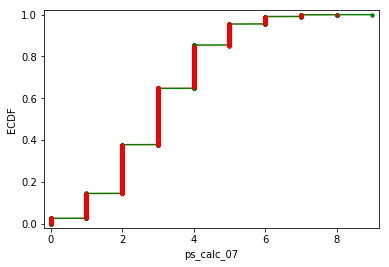

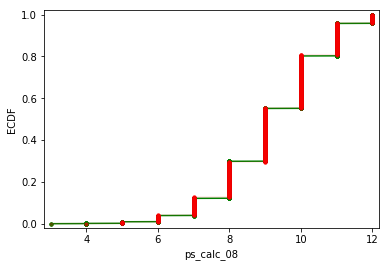

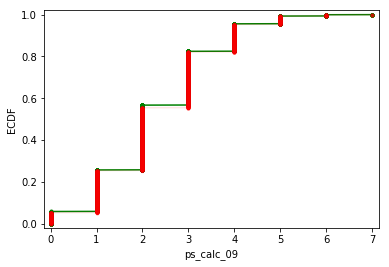

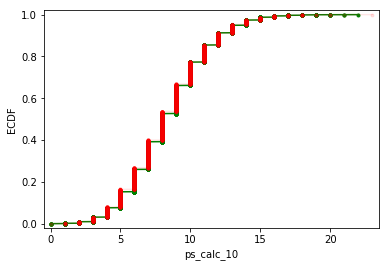

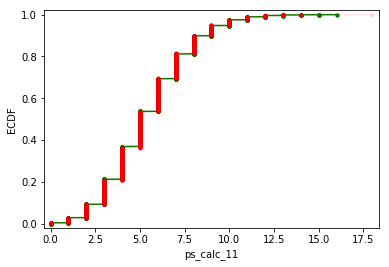

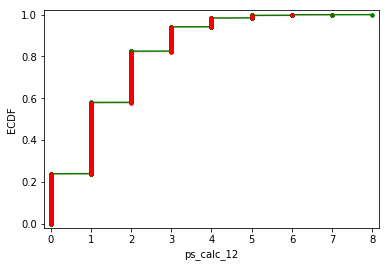

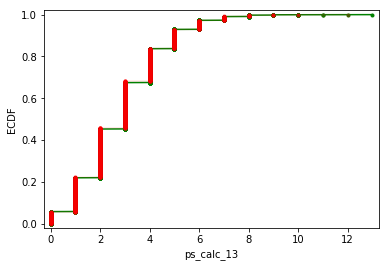

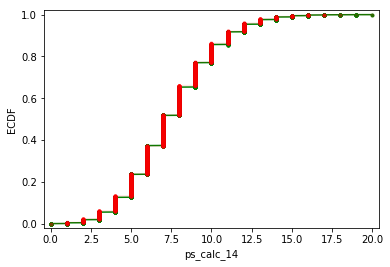

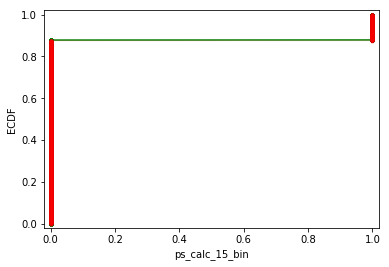

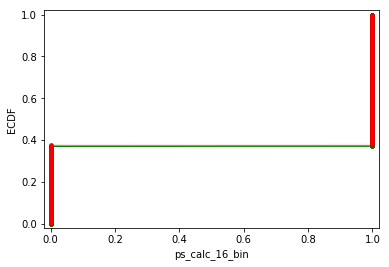

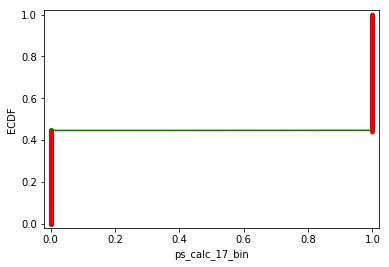

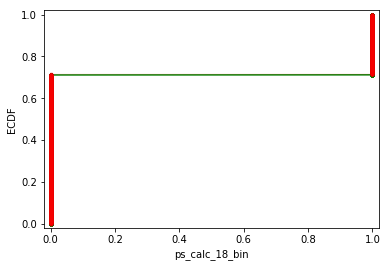

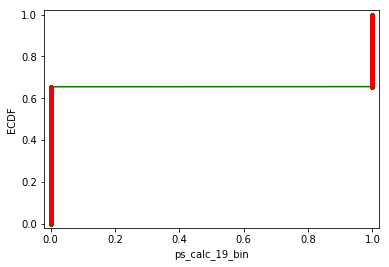

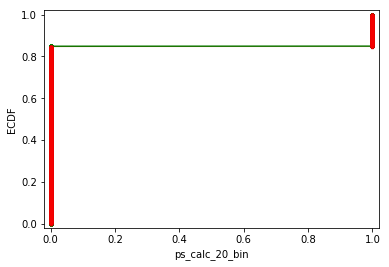

In [6]:
for column in columns:
    plot_ecdf(column, features, false_features)

In [7]:
diff_columns = ['ps_ind_01','ps_ind_03','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_reg_01','ps_reg_02','ps_reg_03',
'ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_11_cat','ps_car_12','ps_car_13','ps_car_15']
diff_features = {}
diff_false_features = {}
for column in diff_columns:
    diff_features[column] = features[column]
    diff_false_features[column] = false_features[column]

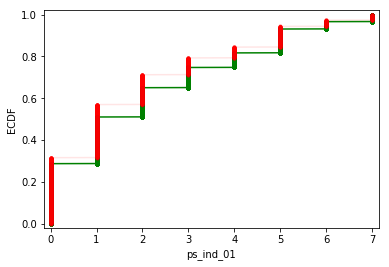

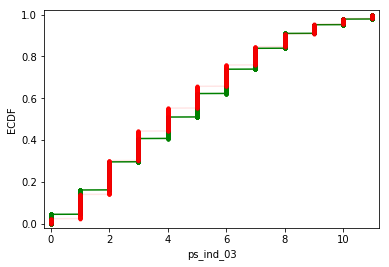

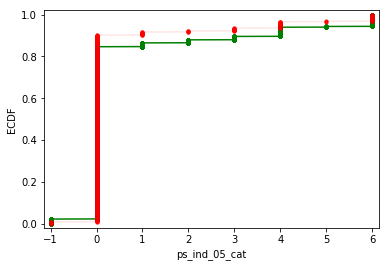

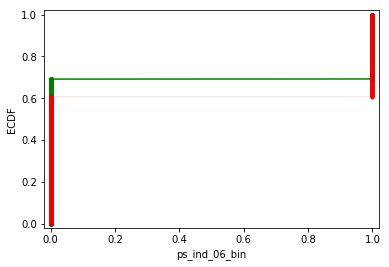

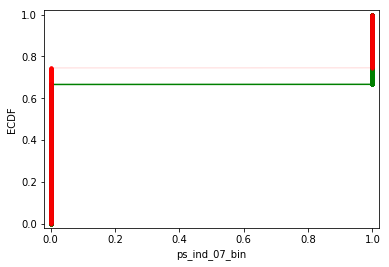

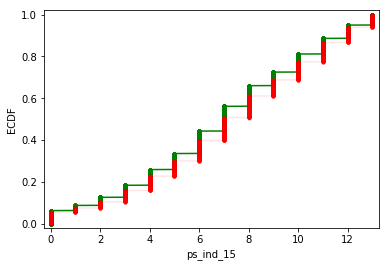

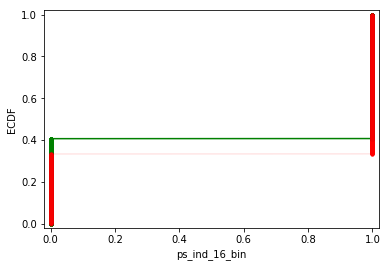

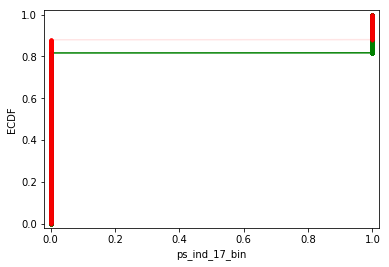

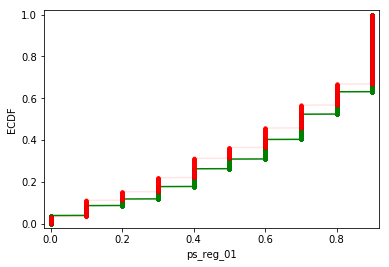

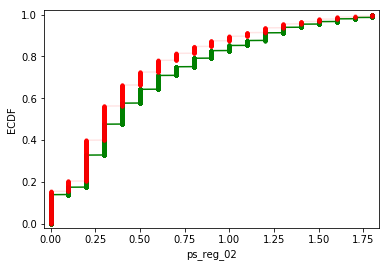

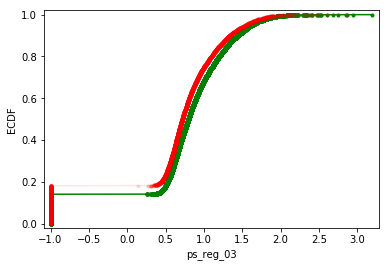

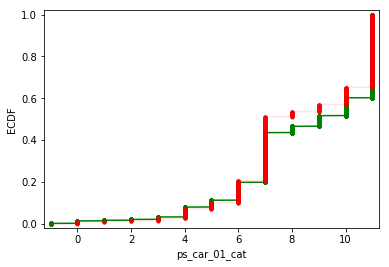

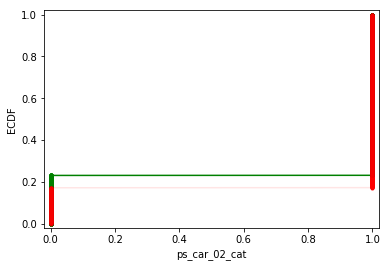

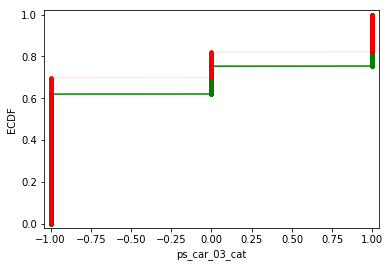

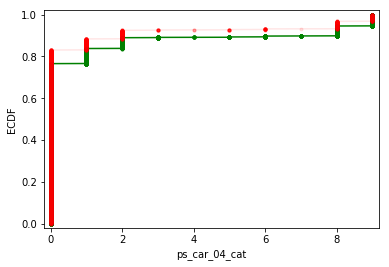

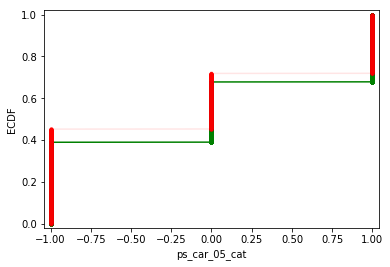

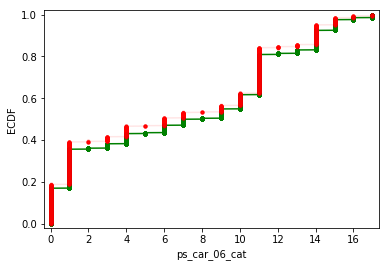

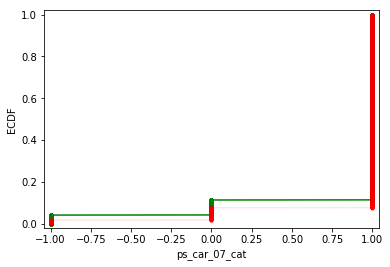

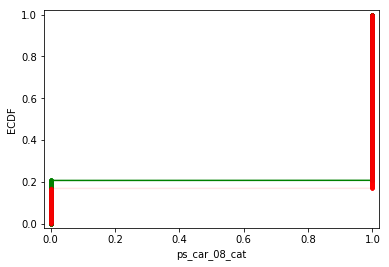

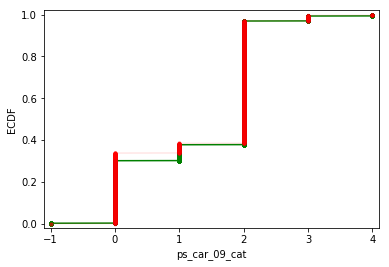

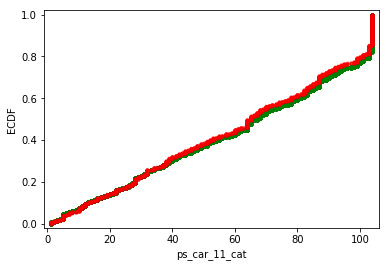

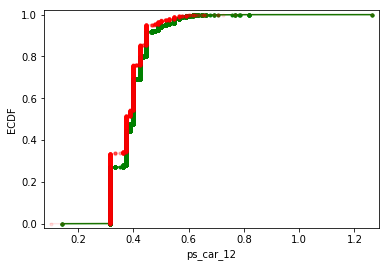

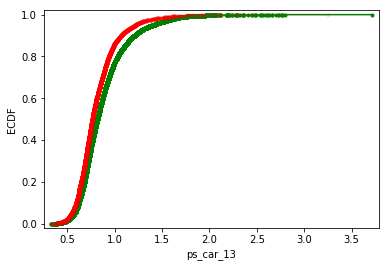

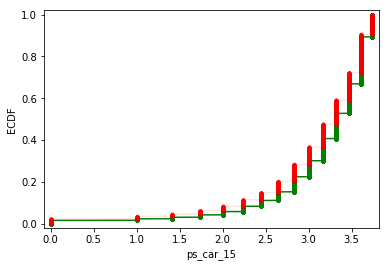

In [8]:
for column in diff_columns:
    plot_ecdf(column, diff_features, diff_false_features)

In [16]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

for column in diff_columns:
    # Compute Pearson correlation coefficient for I. versicolor: r
    r = pearson_r(df[column], df['target'])

    # Print the result
    print(column, ' pearson r: ', r)


ps_ind_01  pearson r:  0.0185702586575
ps_ind_03  pearson r:  0.00835959030266
ps_ind_05_cat  pearson r:  0.0291649468509
ps_ind_06_bin  pearson r:  -0.0340168697038
ps_ind_07_bin  pearson r:  0.0342180745141
ps_ind_15  pearson r:  -0.0215062216879
ps_ind_16_bin  pearson r:  -0.0277780757885
ps_ind_17_bin  pearson r:  0.0370526063359
ps_reg_01  pearson r:  0.0228880444404
ps_reg_02  pearson r:  0.0348000208099
ps_reg_03  pearson r:  0.0308881048331
ps_car_01_cat  pearson r:  0.0162556937426
ps_car_02_cat  pearson r:  -0.0315335961246
ps_car_03_cat  pearson r:  0.0324009706943
ps_car_04_cat  pearson r:  0.0328998749401
ps_car_05_cat  pearson r:  0.0207544341328
ps_car_06_cat  pearson r:  0.0115366599557
ps_car_07_cat  pearson r:  -0.0363952225878
ps_car_08_cat  pearson r:  -0.020341933486
ps_car_09_cat  pearson r:  0.00532249490929
ps_car_11_cat  pearson r:  0.00612879832676
ps_car_12  pearson r:  0.0387898276614
ps_car_13  pearson r:  0.0538987794848
ps_car_15  pearson r:  0.0276672810